# User's Guide, Chapter 9: Chordify

**Chordify** is a madeup word that we created in `music21` for the process of making chords out of non-chords.  Chordify powerful tool for reducing a complex score with multiple parts to a succession of chords in one part that represent everything that is happening in the score.  Take this short chorale by Bach:

In [1]:
from music21 import *

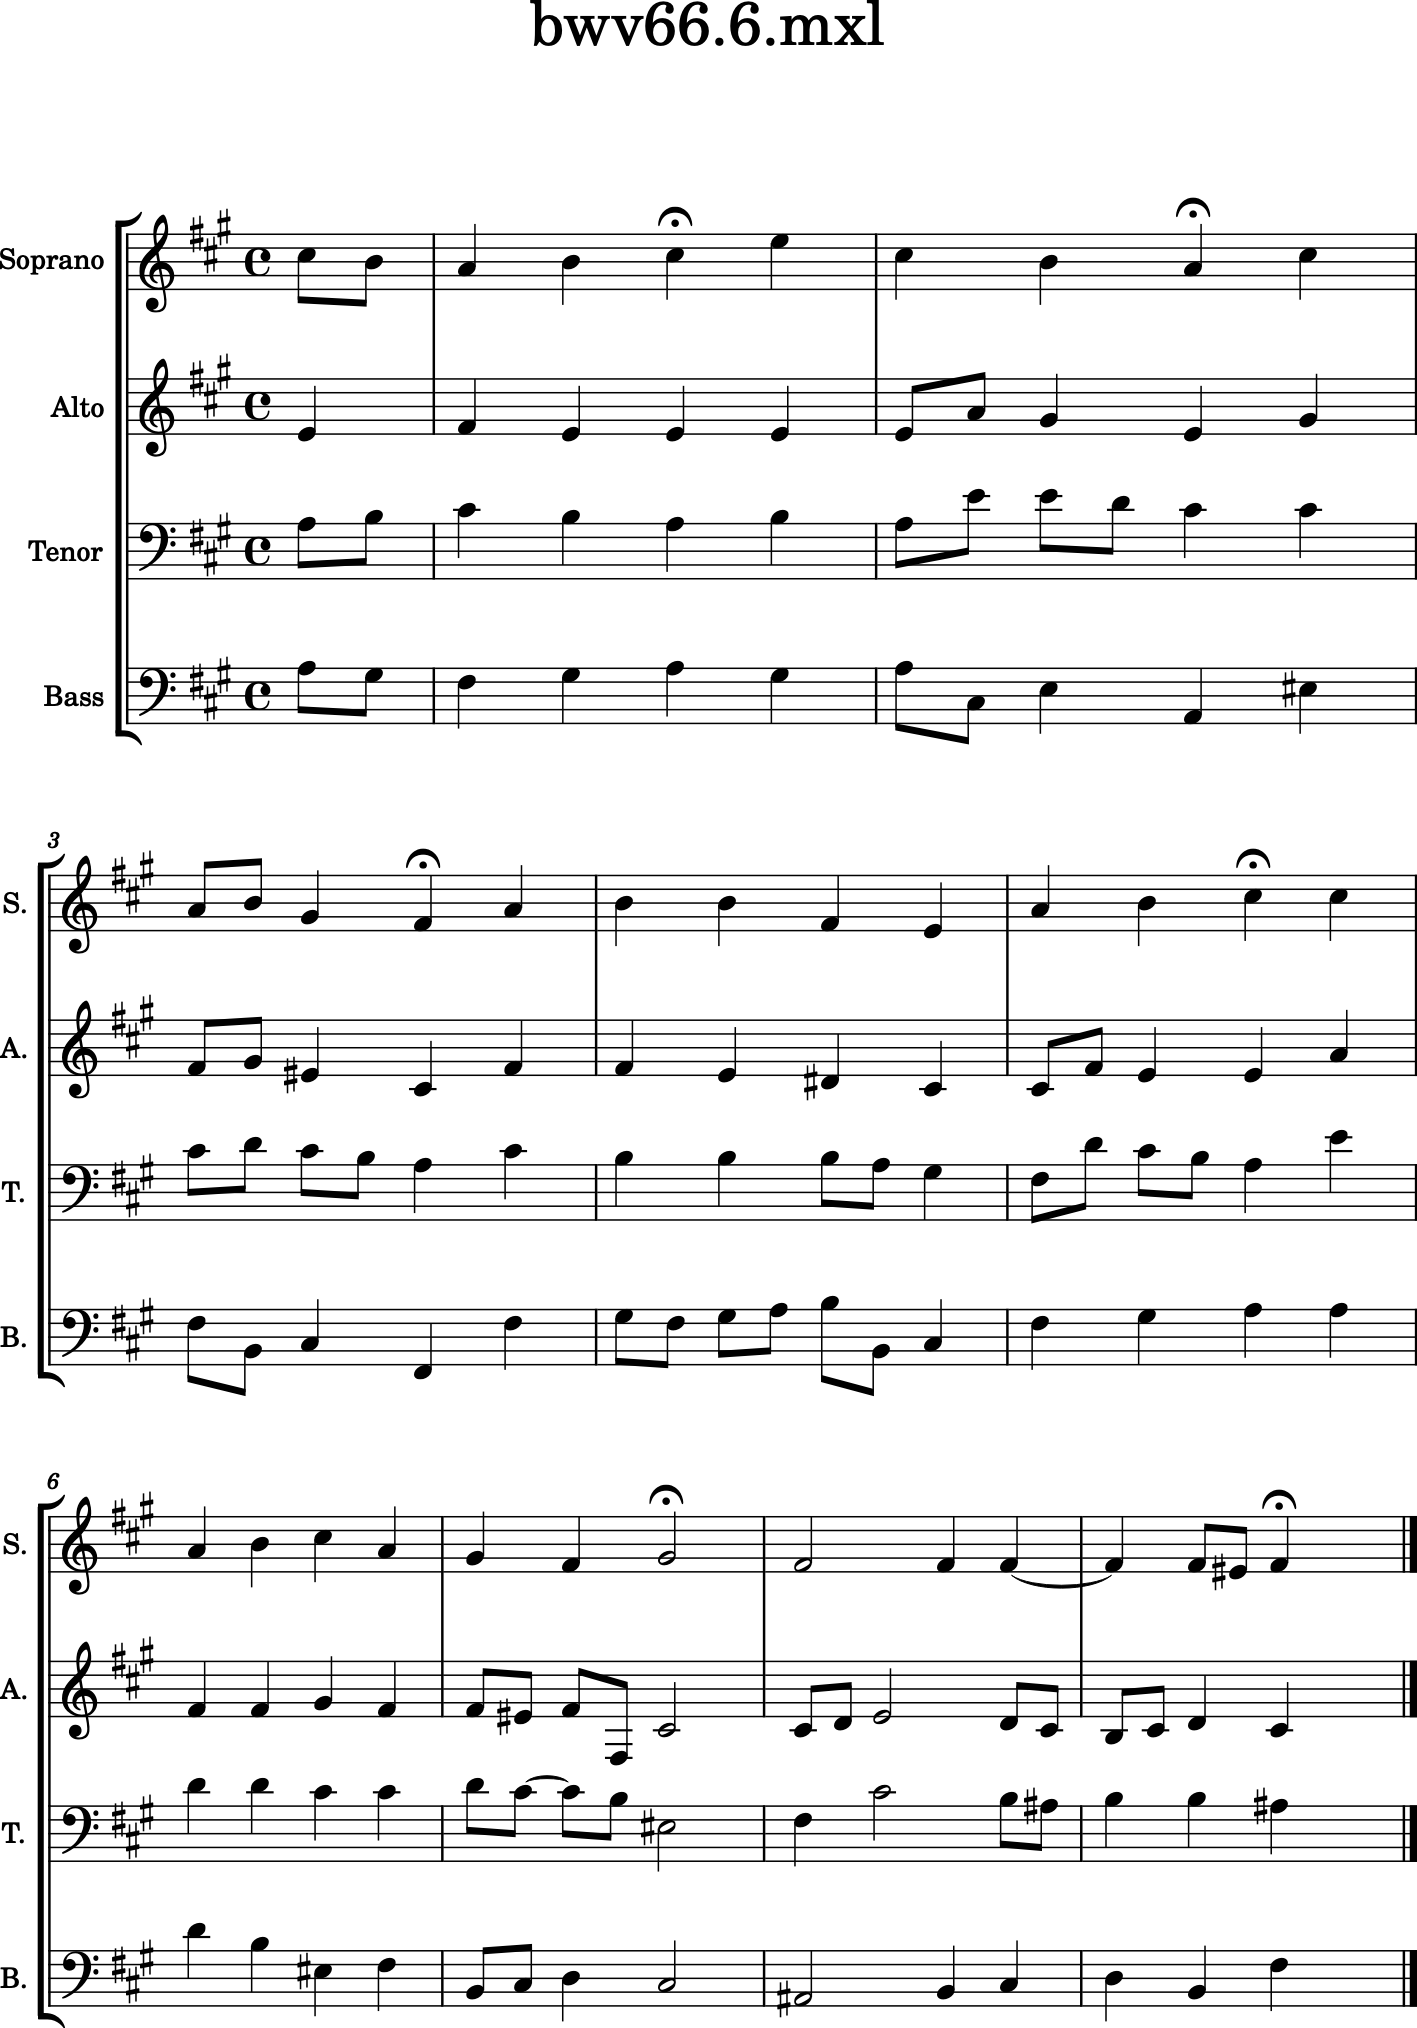

In [2]:
b = corpus.parse('bwv66.6')
b.show()

Let's take it and chordify it using the :meth:`~music21.stream.Stream.chordify` method.

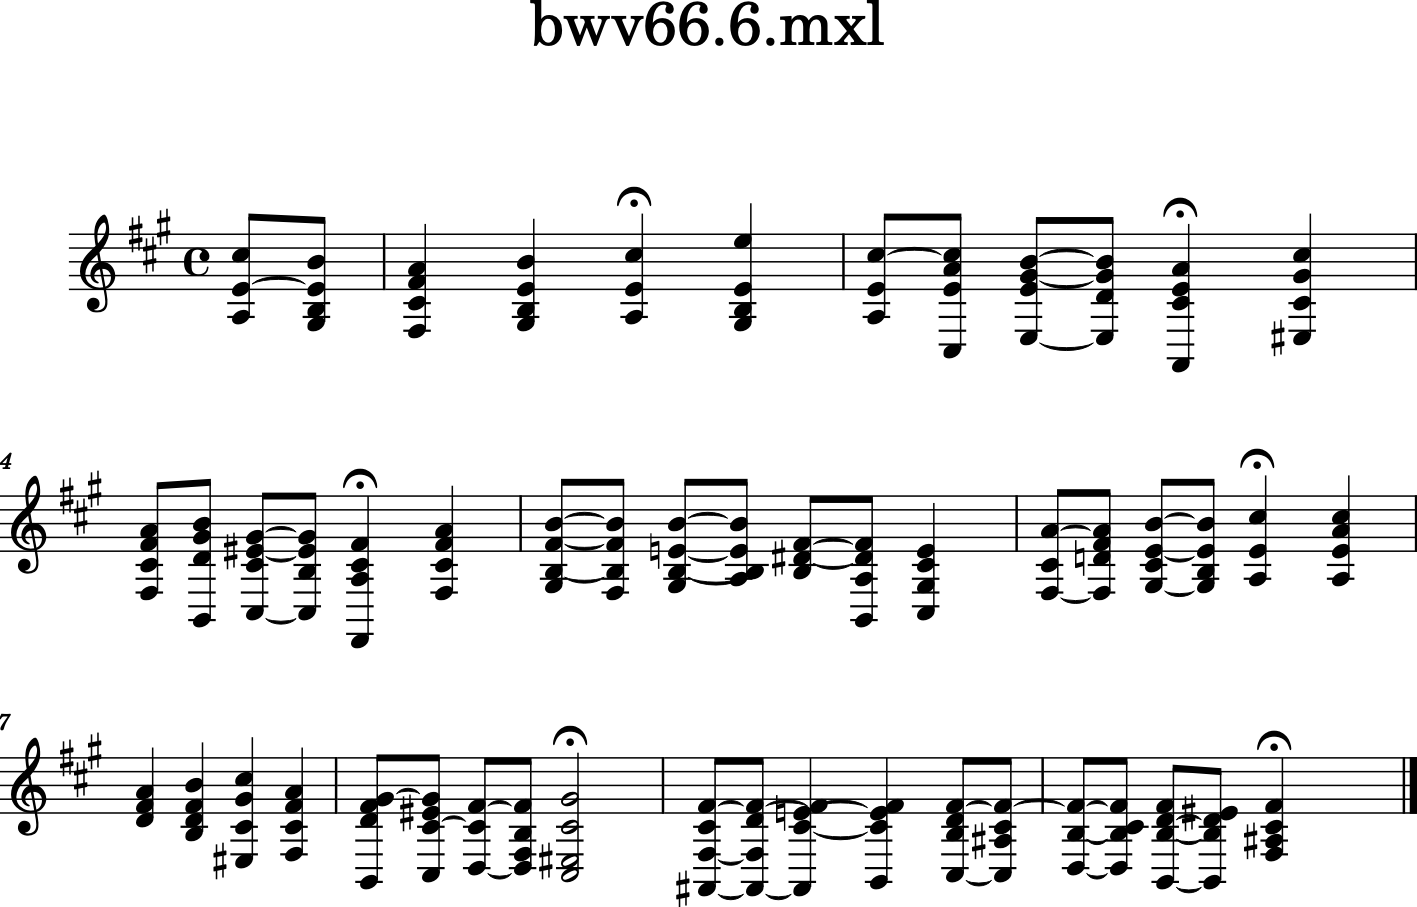

In [3]:
bChords = b.chordify()
bChords.show()

TA-DA! Every note in the score is now represented in a single chord and every moment where some element moves is also represented.  Sometimes this process of chordifying is called "salami slicing," that is, cutting the score so thinly that every moment where something happens is fully represented.

Now we can see if there are any (fully-notated) dominant seventh chords in the piece.  The new chordified part still has measures, so we'll recurse into the chordified part first to get to the chords.  It might also have time signatures, etc., so we will filter them out so we only have chords.

In [4]:
for thisChord in bChords.recurse().getElementsByClass(chord.Chord):
    if thisChord.isDominantSeventh():
        print(thisChord.measureNumber, thisChord.beatStr, thisChord)

2 2 1/2 <music21.chord.Chord E3 D4 G#4 B4>
3 2 1/2 <music21.chord.Chord C#3 B3 E#4 G#4>
4 3 1/2 <music21.chord.Chord B2 A3 D#4 F#4>
8 2 <music21.chord.Chord A#2 C#4 E4 F#4>


Sure enough we can check the score above and see that there are four of them: three of them on the offbeat (m.2 beat 2.5, m. 3 beat 2.5, and m. 4 beat 3.5) which are made from passing motion, and one of them in m. 8 beat 2 also in a metrically weak position.

We can see the chordified version by callling ".show()" on ``bChords`` itself, but it's probably better to see it in the context of the whole score.  Let's put it in the score at the beginning (all `Part` objects should go at the beginning) and then show just measures 0 (pickup) to 4:

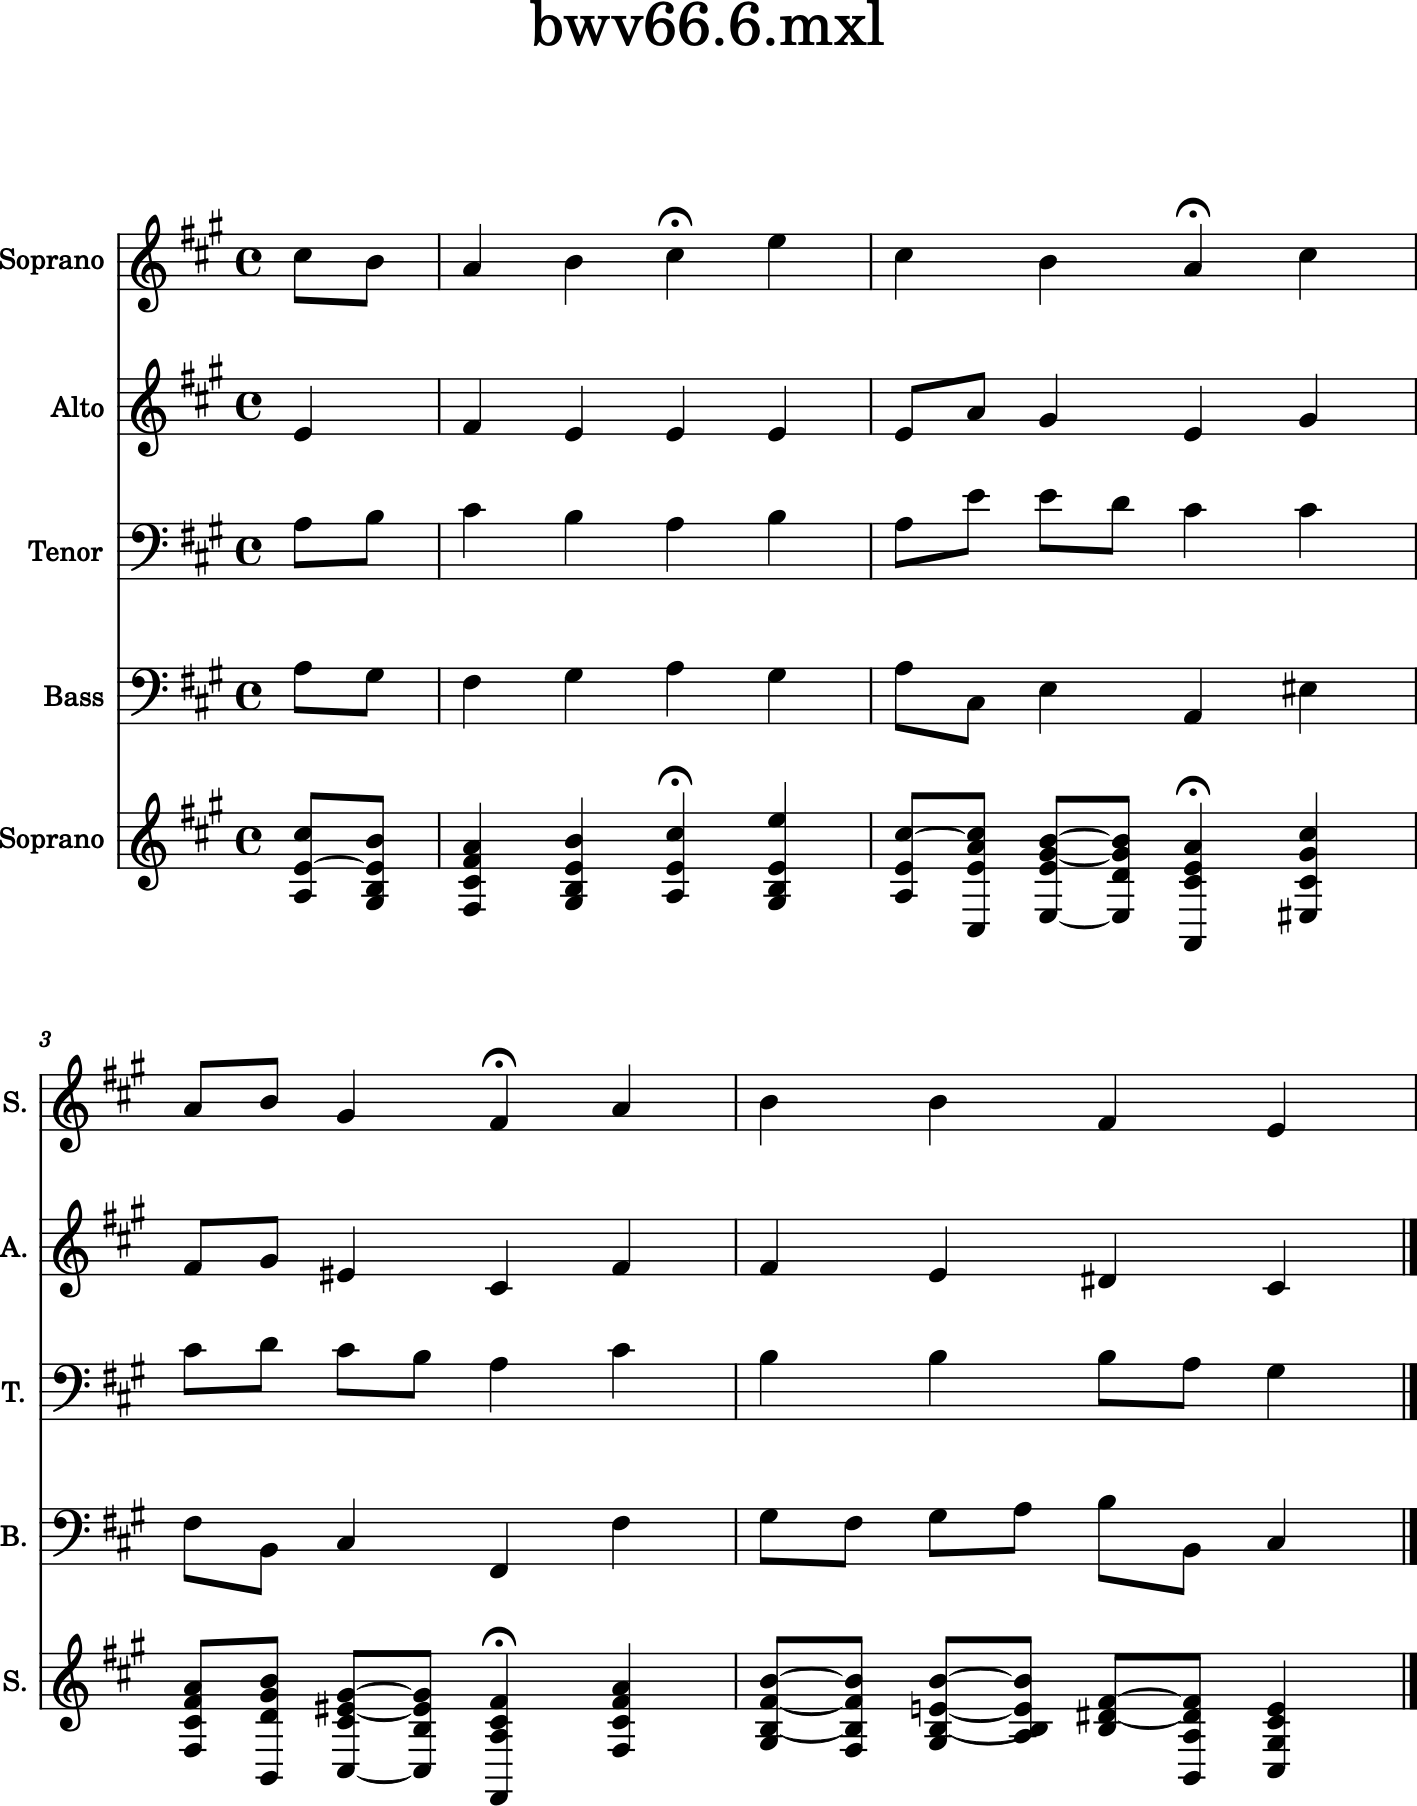

In [5]:
b.insert(0, bChords)
b.measures(0, 4).show()

That's a bit messy to read, so let's put all these chords in ``closedPosition`` (see :ref:`User's Guide, Chapter 7: Chords <usersGuide_07_chords>` for more information).

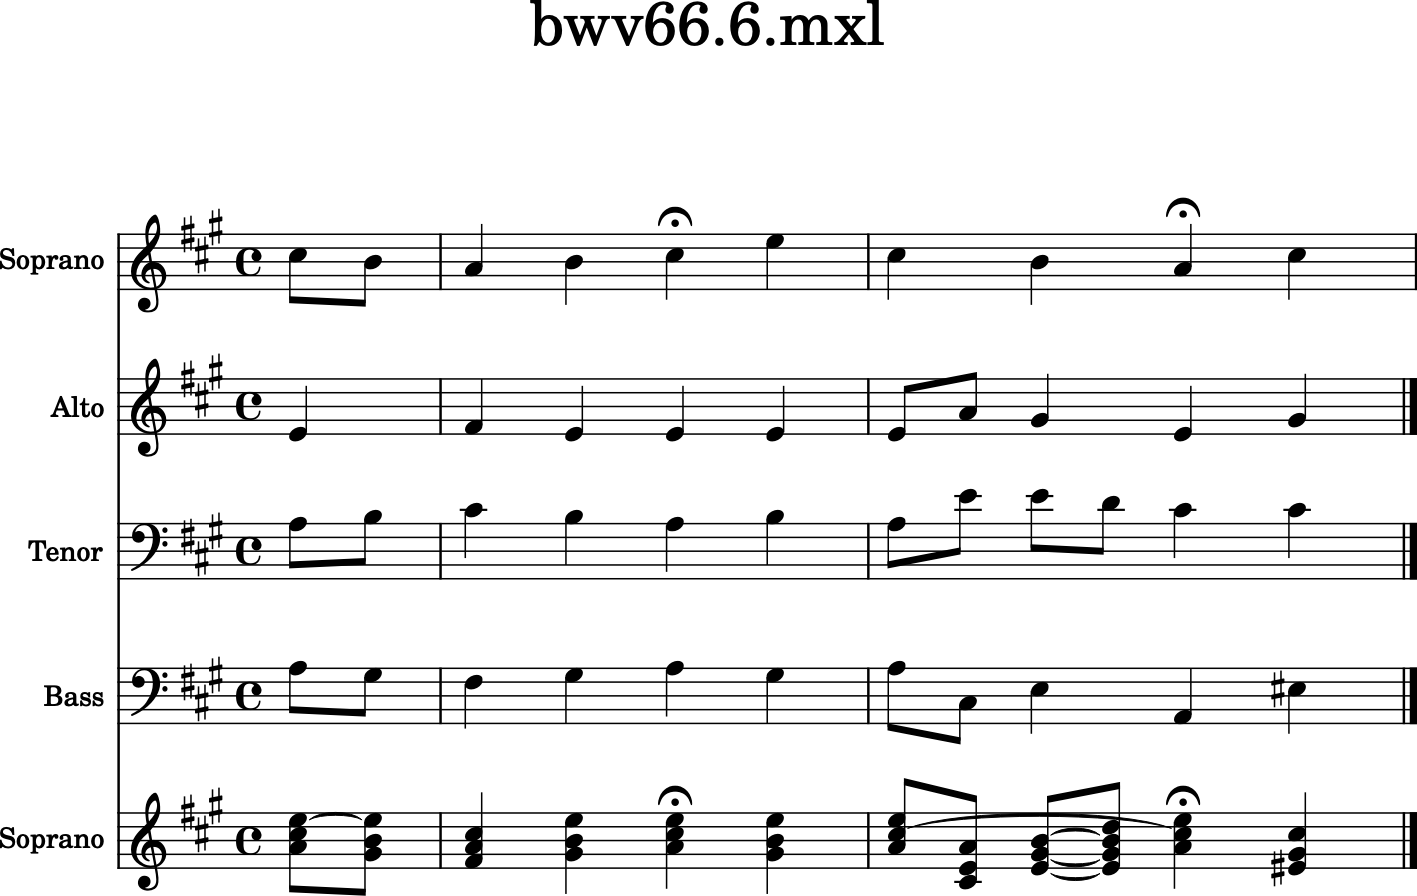

In [6]:
for c in bChords.recurse().getElementsByClass(chord.Chord):
    c.closedPosition(forceOctave=4, inPlace=True)

b.measures(0, 2).show()

Note that when we move a chord to closed position, unfortunately it loses its `tie` information, since the pitch that starts a tie can't tell whether or not the next pitch will end up in a different octave (for instance, the Cs in the first two notes of the second full measure). Maybe it's something we can do someday...

We can use the function ``roman.romanNumeralFromChord`` to label each of the chordified Chords:

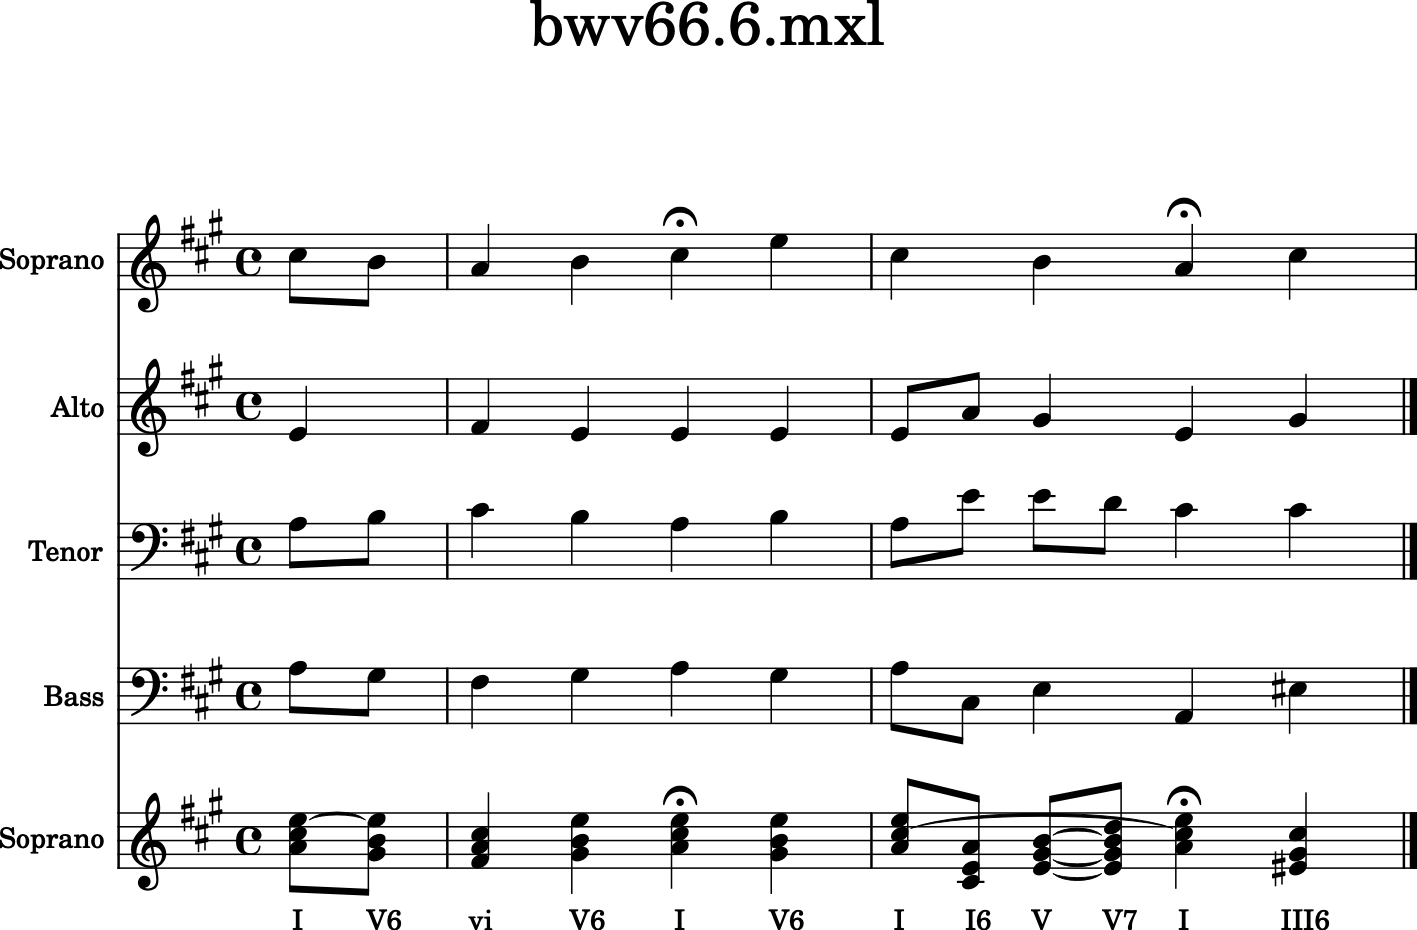

In [7]:
for c in bChords.recurse().getElementsByClass(chord.Chord):
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

b.measures(0, 2).show()

We can also see everything directly if we look at the ``.show('text')`` output:

In [8]:
bChords.measures(0, 2).show('text')

{0.0} <music21.instrument.Instrument 'P1: Soprano: Instrument 1'>
{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark Quarter=96 (playback only)>
    {0.0} <music21.key.Key of f# minor>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord G#4 B4 E5>
{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.chord.Chord F#4 A4 C#5>
    {1.0} <music21.chord.Chord G#4 B4 E5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord G#4 B4 E5>
{5.0} <music21.stream.Measure 2 offset=5.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord C#4 E4 A4>
    {1.0} <music21.chord.Chord E4 G#4 B4>
    {1.5} <music21.chord.Chord E4 G#4 B4 D5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord E#4 G#4 C#5>


We can also just extract the lyrics, where we stored the RomanNumeral information:

In [9]:
for c in bChords.measures(0, 2).recurse():
    if 'Chord' not in c.classes:
        continue
    print(c.lyric, end=' ')

I V6 vi V6 I V6 I I6 V V7 I III6 

## Using Chordify to Annotate Intervals

One great way to quickly make a reduction of a score is with `chordify` and the `annotateIntervals` method on Chords. We can use one of the multipart-opus ABC files described in the last chapter to demonstrate.

Let us load up one of the most beautiful memorial pieces of all time, the motet on the death of Johannes Ockeghem by Josquin des Prez (d. 1521):

In [10]:
o = corpus.parse('josquin/laDeplorationDeLaMorteDeJohannesOckeghem')
for s in o:
    print(s)

<music21.stream.Score 0x10811aea0>
<music21.stream.Score 0x108285ba0>
<music21.stream.Score 0x1082843e0>
<music21.stream.Score 0x108284510>
<music21.stream.Score 0x108284770>


Okay so we have a collection of scores to merge into parts -- this is an unusual but not totally rare phenomenon, so we merge them:

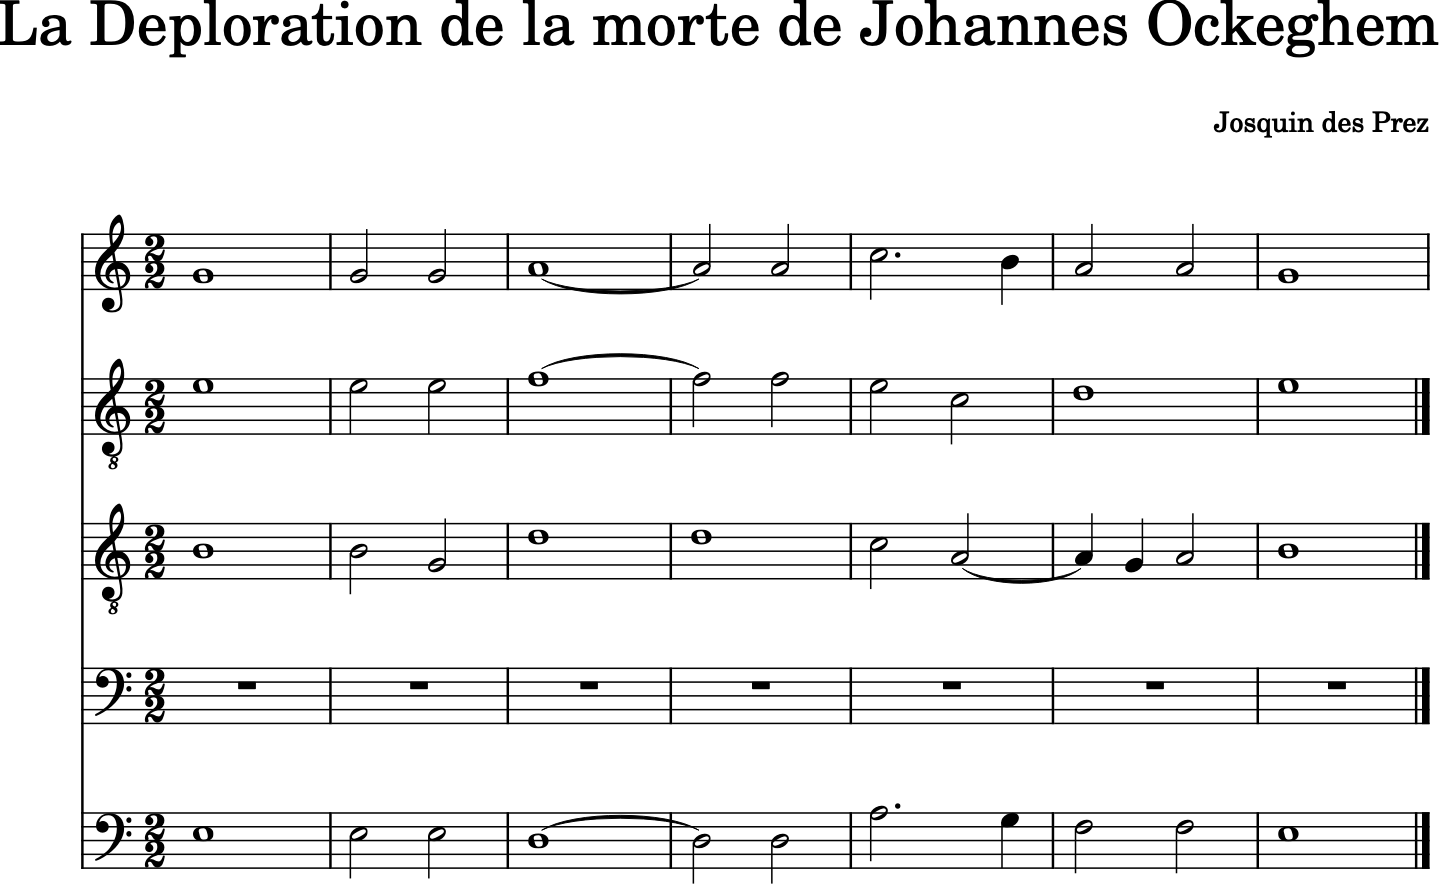

In [11]:
mergedScores = o.mergeScores()
scoreExcerpt = mergedScores.measures(127, 133)
scoreExcerpt.show()

Let's chordify it:

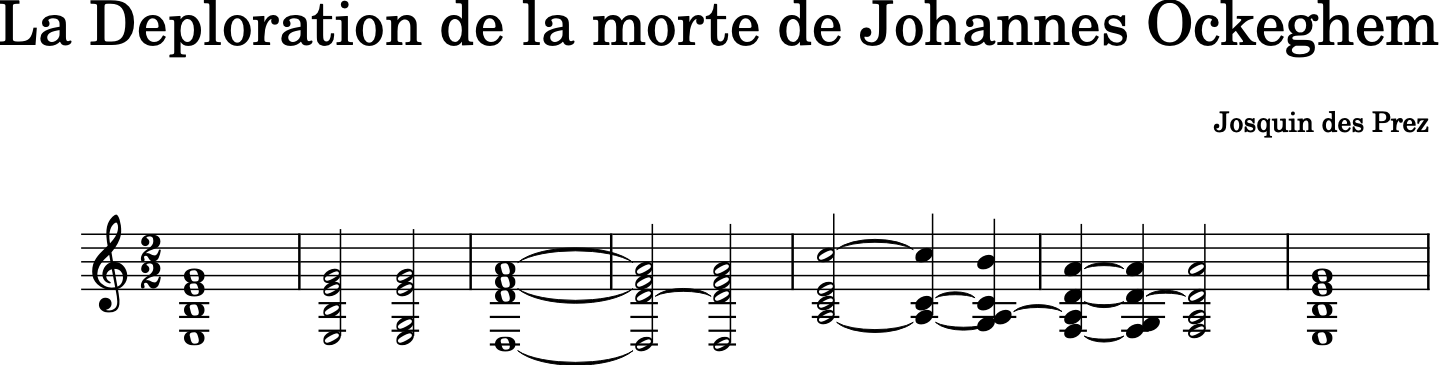

In [12]:
reduction = scoreExcerpt.chordify()
reduction.show()

We'll iterate over the chords and put them in closed position in octave 4 and run the `annotateIntervals` command:

In [13]:
for c in reduction.recurse().getElementsByClass(chord.Chord):
    c.closedPosition(forceOctave=4, inPlace=True)
    c.annotateIntervals(inPlace=True)

We will put the reduction back into the score and show it.  We `insert` it at the zero point of the score, rather than using `append` because it begins at the same time point as the other parts.  Let's also get rid of the fourth part, since it's blank.

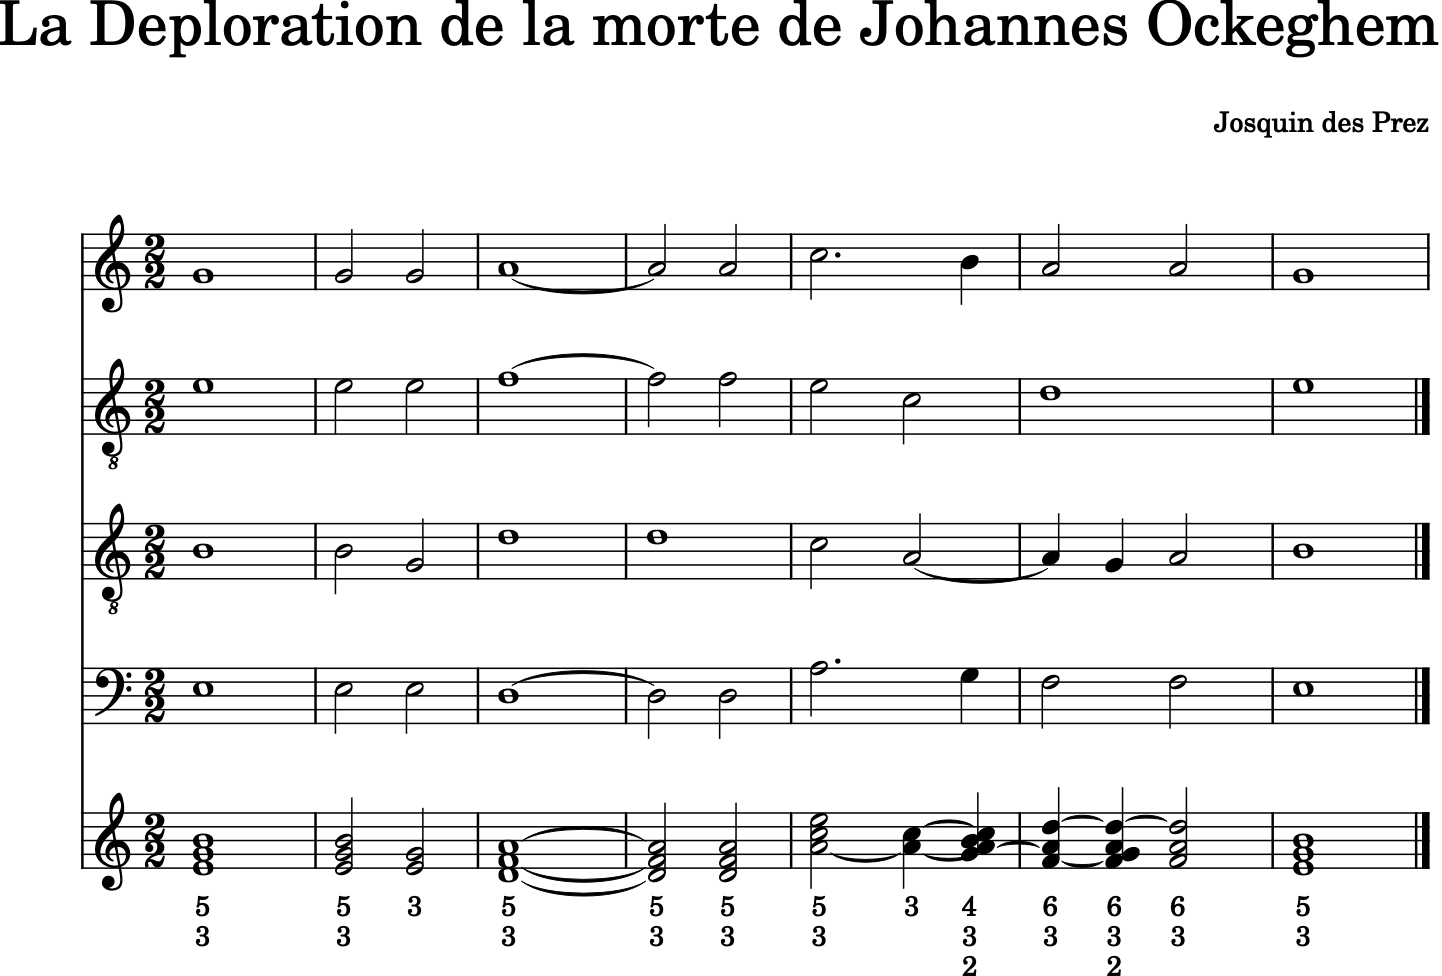

In [14]:
scoreExcerpt.insert(0, reduction)
emptyPart = scoreExcerpt.parts[3]
scoreExcerpt.remove(emptyPart)
scoreExcerpt.show()

The intervals have been added as lyrics on the chord:

In [15]:
for c in reduction.recurse().getElementsByClass('Chord'):
    print(c, end=': ')
    for lyric in c.lyrics:
        print(lyric.text, end=' ')
    print()

<music21.chord.Chord E4 G4 B4>: 5 3 
<music21.chord.Chord E4 G4 B4>: 5 3 
<music21.chord.Chord E4 G4>: 3 
<music21.chord.Chord D4 F4 A4>: 5 3 
<music21.chord.Chord D4 F4 A4>: 5 3 
<music21.chord.Chord D4 F4 A4>: 5 3 
<music21.chord.Chord A4 C5 E5>: 5 3 
<music21.chord.Chord A4 C5>: 3 
<music21.chord.Chord G4 A4 B4 C5>: 4 3 2 
<music21.chord.Chord F4 A4 D5>: 6 3 
<music21.chord.Chord F4 G4 A4 D5>: 6 3 2 
<music21.chord.Chord F4 A4 D5>: 6 3 
<music21.chord.Chord E4 G4 B4>: 5 3 


From here it is easy to find interesting places like that "4321" chord at the end of the fifth measure of the excerpt, somthing I didn't know would be found in high Renaissance polyphony even as a collection of passing tones!

## Chordify and advanced scores

More complex scores can also be chordified. If there are lots of tuplets, you might get odd results.  Such as with Opus 19, no. 6, by Arnold Schoenberg.

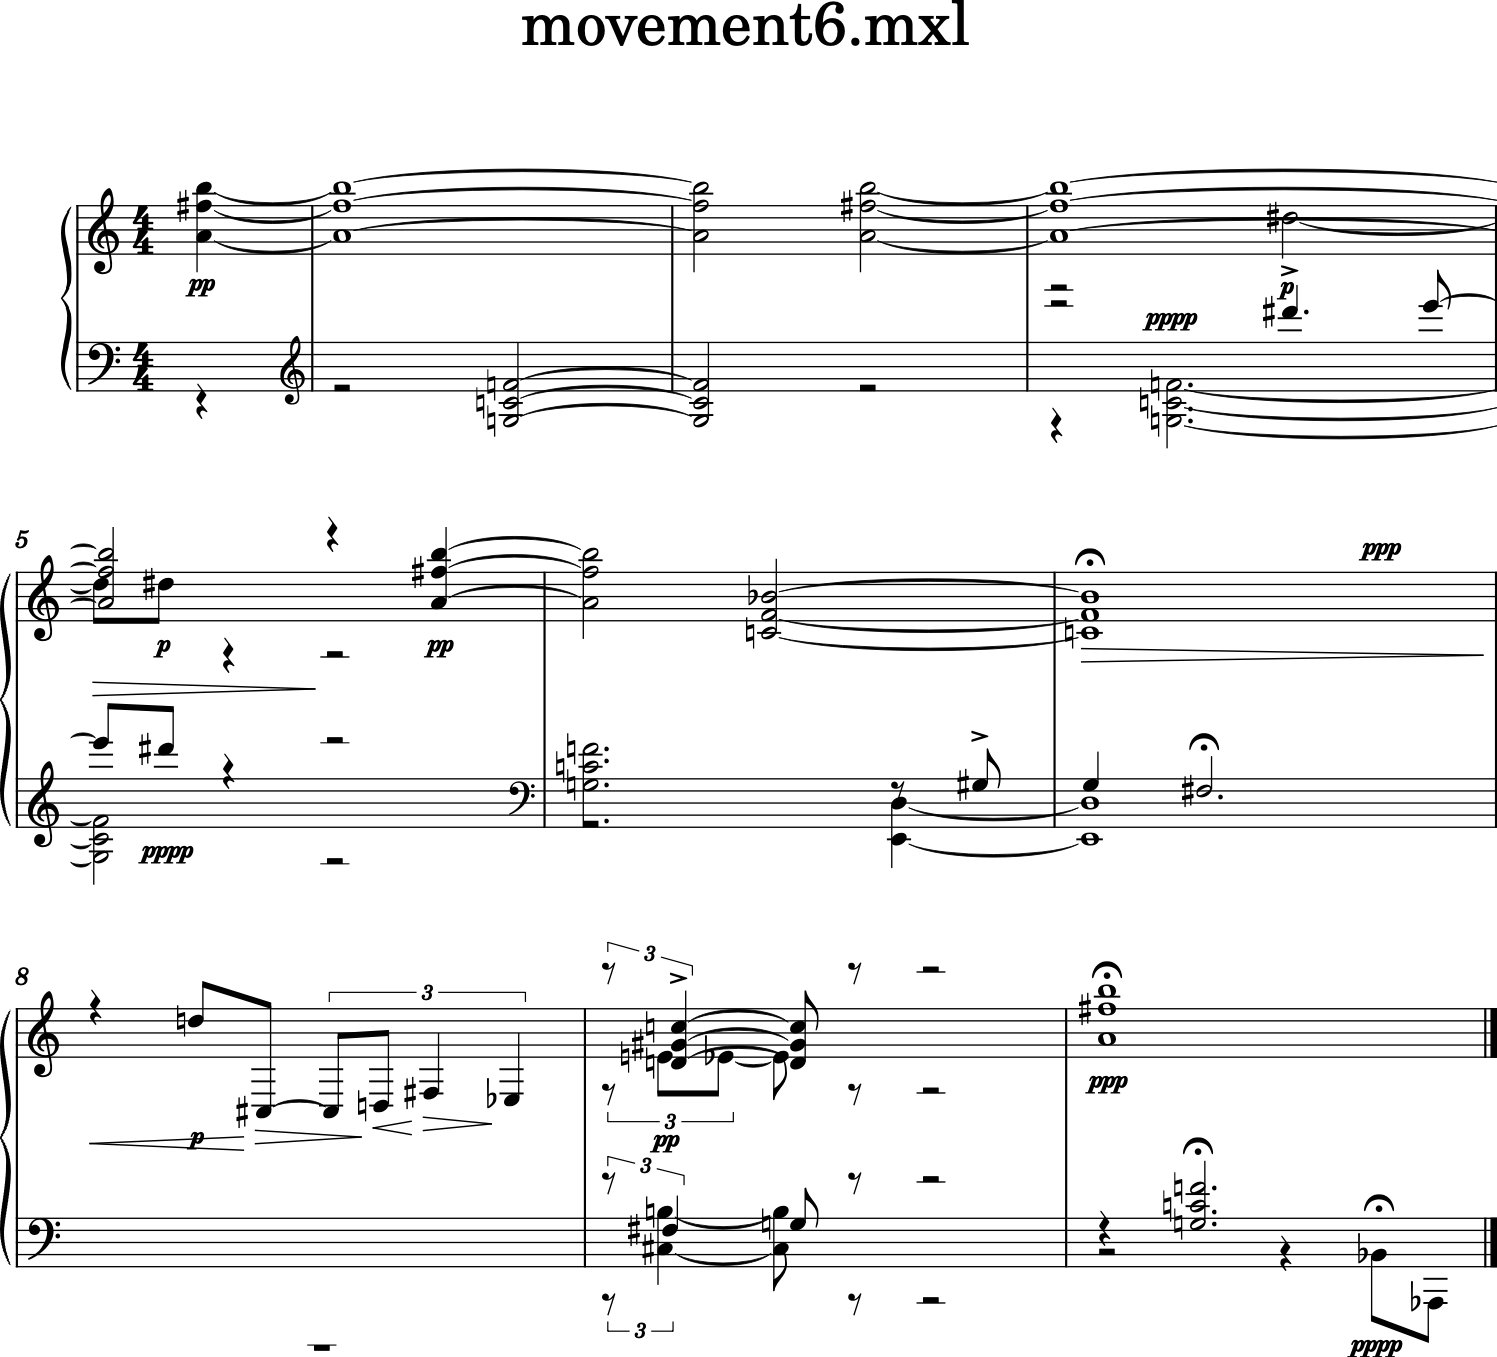

In [16]:
schoenberg = corpus.parse('schoenberg/opus19', 6)
schoenberg.show()

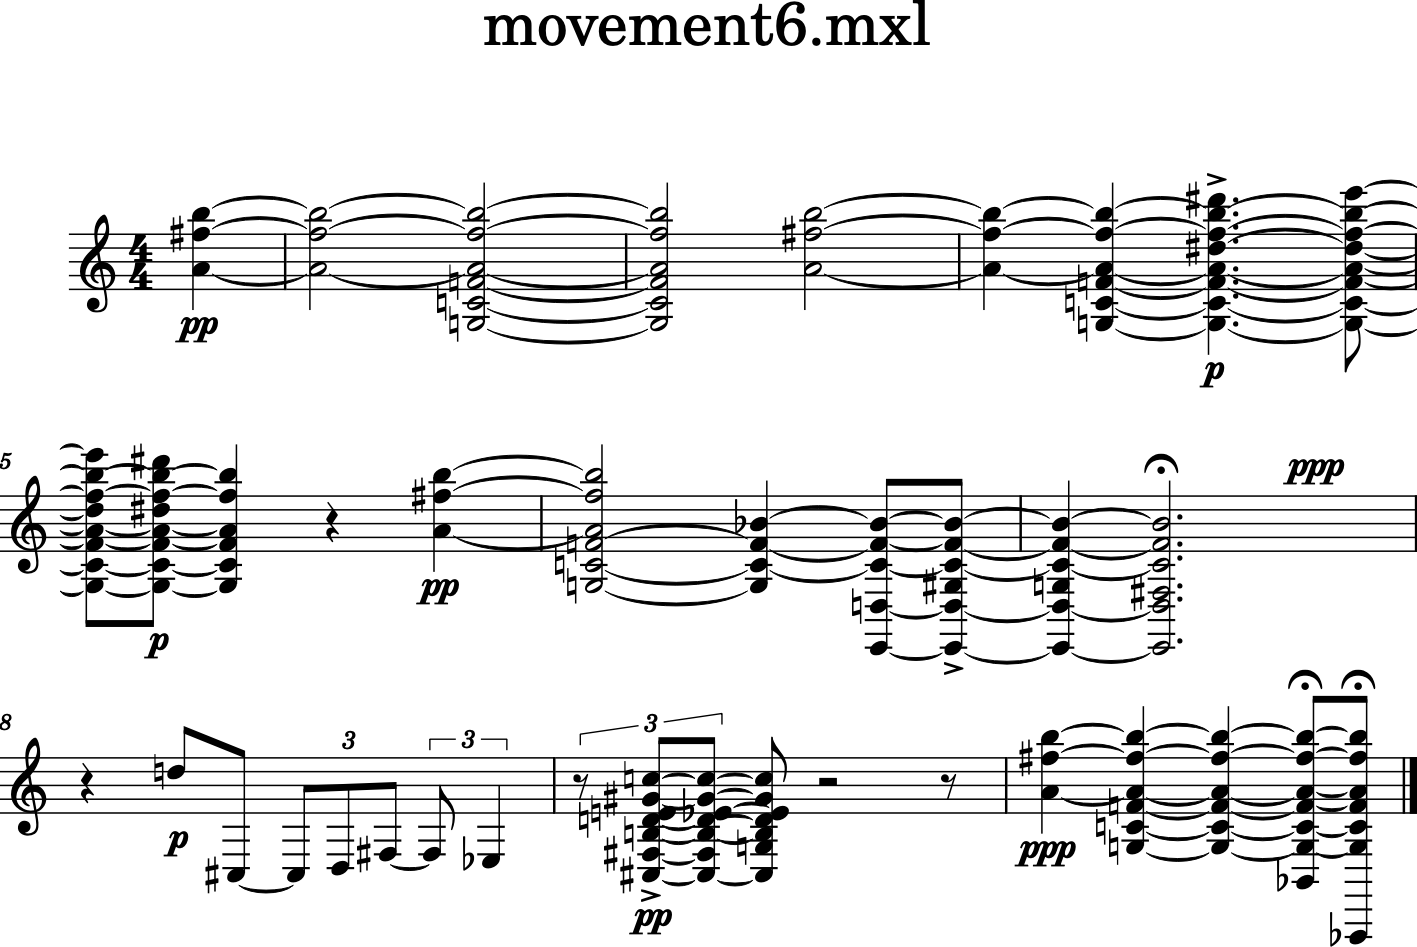

In [17]:
chorded = schoenberg.chordify()
chorded.show()

There are more specialized commands for ``.chordify``, so if you want to learn more, look at the :meth:`~music21.stream.Stream.chordify` documentation.  We will get to the option, `addPartIdAsGroup` later, which will let you know exactly where each pitch in the chordified Chord comes from.  But for now, let's jump to our first example, :ref:`Chapter 10: Example 1 <usersGuide_10_examples1>`